In [570]:
import pandas as pd
# imports the train_test_split function from the model_selection module of the scikit-learn library
from sklearn.model_selection import train_test_split
# imports the DecisionTreeClassifier class from the tree module of the scikit-learn library
from sklearn.tree import DecisionTreeClassifier
# imports the Recursive Feature Elimination (RFE) function from the feature_selection module of the scikit-learn library
from sklearn.feature_selection import RFE
# Useful library for linear algebra functions
import numpy as np
# Library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# import SVC classifier
from sklearn.svm import SVC
# Library for performance analysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
# Import package
import os
# To save to and load model from the file
import pickle
# To mount Google Drive to read dataset from the drive (authentication required)
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Reading Data


In [ ]:
data = pd.read_csv('sample_data/dataset_mod.csv')
data

,mum_age,mum_height,presentation_breech,presentation_cephalic,presentation_other,placenta_site_previa,amniotic_anhydramnios,amniotic_normal,hypertension_nil,hypertension_pih,diabetes_gdm,diabetes_nil,delivery_mode
0,35.0,143.0,0,1,0,0,0,1,1,0,1,0,0
1,35.0,143.0,0,1,0,0,0,1,1,0,1,0,0
2,35.0,143.0,0,1,0,0,0,1,1,0,1,0,0
3,35.0,143.0,0,1,0,0,0,1,1,0,1,0,0
4,40.0,164.0,0,1,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,37.0,150.0,0,1,0,0,0,1,1,0,0,1,1
1931,37.0,150.0,0,0,1,0,0,1,1,0,0,1,1
1932,32.0,170.0,0,1,0,0,0,1,1,0,0,1,1
1933,32.0,170.0,0,1,0,0,0,1,1,0,0,1,1


In [ ]:
df = pd.DataFrame(data)
df

,mum_age,mum_height,presentation_breech,presentation_cephalic,presentation_other,placenta_site_previa,amniotic_anhydramnios,amniotic_normal,hypertension_nil,hypertension_pih,diabetes_gdm,diabetes_nil,delivery_mode
0,35.0,143.0,0,1,0,0,0,1,1,0,1,0,0
1,35.0,143.0,0,1,0,0,0,1,1,0,1,0,0
2,35.0,143.0,0,1,0,0,0,1,1,0,1,0,0
3,35.0,143.0,0,1,0,0,0,1,1,0,1,0,0
4,40.0,164.0,0,1,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,37.0,150.0,0,1,0,0,0,1,1,0,0,1,1
1931,37.0,150.0,0,0,1,0,0,1,1,0,0,1,1
1932,32.0,170.0,0,1,0,0,0,1,1,0,0,1,1
1933,32.0,170.0,0,1,0,0,0,1,1,0,0,1,1


In [ ]:
# Round the values in the "mum_age" column to the nearest whole number
df['mum_age'] = df['mum_age'].round(0)
# Save the updated DataFrame back to a CSV file
df.to_csv('sample_data/dataset_mod.csv', index=False)
df

,mum_age,mum_height,presentation_breech,presentation_cephalic,presentation_other,placenta_site_previa,amniotic_anhydramnios,amniotic_normal,hypertension_nil,hypertension_pih,diabetes_gdm,diabetes_nil,delivery_mode
0,35.0,143.0,0,1,0,0,0,1,1,0,1,0,0
1,35.0,143.0,0,1,0,0,0,1,1,0,1,0,0
2,35.0,143.0,0,1,0,0,0,1,1,0,1,0,0
3,35.0,143.0,0,1,0,0,0,1,1,0,1,0,0
4,40.0,164.0,0,1,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,37.0,150.0,0,1,0,0,0,1,1,0,0,1,1
1931,37.0,150.0,0,0,1,0,0,1,1,0,0,1,1
1932,32.0,170.0,0,1,0,0,0,1,1,0,0,1,1
1933,32.0,170.0,0,1,0,0,0,1,1,0,0,1,1


## Number of feature in dataset


In [ ]:
# Get number of features available from given dataset
features = [f for f in df.columns if f not in ['delivery_mode']]
len(features)

12

#Data **Exploration**

## Bar chart compare the method of delivery 

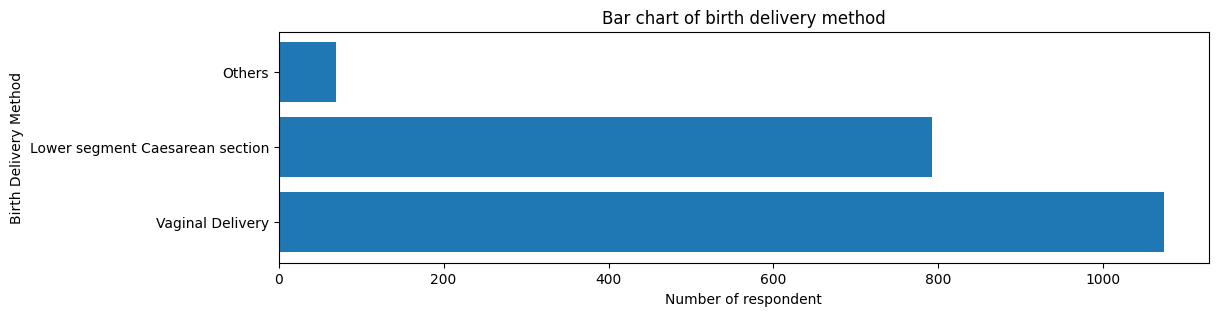

In [ ]:
# Compare the method of delivery availiable in this dataset
vaginal_delivery = df.loc[:,"delivery_mode"].eq(0).sum()
lower_segment_caesarean_section = df.loc[:,"delivery_mode"].eq(1).sum() 
others = df.loc[:,"delivery_mode"].eq(2).sum()
Birth_delivery = ["Vaginal Delivery","Lower segment Caesarean section","Others"]
plt.figure(figsize=(12, 3))
plt.barh(Birth_delivery, [vaginal_delivery, lower_segment_caesarean_section, others], align = 'center')
plt.xlabel('Number of respondent')
plt.ylabel("Birth Delivery Method")
plt.title("Bar chart of birth delivery method")
plt.show()

#Data Preprocessing

## Split Data

In [ ]:
# split data into X and y
X_data = df.drop('delivery_mode', axis=1)  # drop the 'delivery_mode' column to get the predictor variables
y_data = df['delivery_mode']  # assign the 'delivery_mode' column to the target variable
# check and verify if the rows and columns are correct
print(X_data.shape)  # print the shape of the predictor variable data

(1935, 12)


In [ ]:
X_data

,mum_age,mum_height,presentation_breech,presentation_cephalic,presentation_other,placenta_site_previa,amniotic_anhydramnios,amniotic_normal,hypertension_nil,hypertension_pih,diabetes_gdm,diabetes_nil
0,35.0,143.0,0,1,0,0,0,1,1,0,1,0
1,35.0,143.0,0,1,0,0,0,1,1,0,1,0
2,35.0,143.0,0,1,0,0,0,1,1,0,1,0
3,35.0,143.0,0,1,0,0,0,1,1,0,1,0
4,40.0,164.0,0,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1930,37.0,150.0,0,1,0,0,0,1,1,0,0,1
1931,37.0,150.0,0,0,1,0,0,1,1,0,0,1
1932,32.0,170.0,0,1,0,0,0,1,1,0,0,1
1933,32.0,170.0,0,1,0,0,0,1,1,0,0,1


In [ ]:
y_data

0       0
1       0
2       0
3       0
4       0
       ..
1930    1
1931    1
1932    1
1933    1
1934    1
Name: delivery_mode, Length: 1935, dtype: int64

## Feature Selection

In [ ]:
# Feature selection using Recursive Feature Elimination (RFE)
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
fit = rfe.fit(X_data, y_data)
print("Number of features selected: %s" % (fit.n_features_))
print("Selected features: %s" % (fit.support_))
print("Ranking of features: %s" % (fit.ranking_))

Number of features selected: 10
Selected features: [ True  True  True  True  True False False  True  True  True  True  True]
Ranking of features: [1 1 1 1 1 2 3 1 1 1 1 1]


## Obtain list of selected feature

In [ ]:
# Obtain the list of features selected
final_features = []
indexes = np.where(fit.support_ == True)
for x in np.nditer(indexes):
    final_features.append(features[x])
print(final_features)

['mum_age', 'mum_height', 'presentation_breech', 'presentation_cephalic', 'presentation_other', 'amniotic_normal', 'hypertension_nil', 'hypertension_pih', 'diabetes_gdm', 'diabetes_nil']


In [ ]:
X_data = df[final_features]
X_data

,mum_age,mum_height,presentation_breech,presentation_cephalic,presentation_other,amniotic_normal,hypertension_nil,hypertension_pih,diabetes_gdm,diabetes_nil
0,35.0,143.0,0,1,0,1,1,0,1,0
1,35.0,143.0,0,1,0,1,1,0,1,0
2,35.0,143.0,0,1,0,1,1,0,1,0
3,35.0,143.0,0,1,0,1,1,0,1,0
4,40.0,164.0,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1930,37.0,150.0,0,1,0,1,1,0,0,1
1931,37.0,150.0,0,0,1,1,1,0,0,1
1932,32.0,170.0,0,1,0,1,1,0,0,1
1933,32.0,170.0,0,1,0,1,1,0,0,1


In [ ]:
y_data


0       0
1       0
2       0
3       0
4       0
       ..
1930    1
1931    1
1932    1
1933    1
1934    1
Name: delivery_mode, Length: 1935, dtype: int64

## Splitting data wirh selected feature

In [ ]:
# Splitting data into 80% training and 20% testing sets
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 25)
x_train

,mum_age,mum_height,presentation_breech,presentation_cephalic,presentation_other,amniotic_normal,hypertension_nil,hypertension_pih,diabetes_gdm,diabetes_nil
7,36.0,165.0,0,1,0,1,1,0,0,1
12,42.0,155.0,0,1,0,1,0,1,1,0
1288,41.0,156.0,0,1,0,1,1,0,0,1
1613,33.0,158.0,1,0,0,1,1,0,0,1
937,35.0,150.0,0,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1341,46.0,163.0,0,1,0,1,1,0,1,0
143,38.0,155.0,0,1,0,1,1,0,1,0
474,31.0,154.5,0,1,0,1,1,0,0,1
318,40.0,148.0,0,1,0,1,1,0,0,1


In [ ]:
# check the shape of X_train and X_test dataset
x_train.shape, x_test.shape

((1548, 10), (387, 10))

In [ ]:
y_train

7       1
12      1
1288    2
1613    0
937     1
       ..
1341    1
143     1
474     1
318     0
1156    1
Name: delivery_mode, Length: 1548, dtype: int64

#  Model Training

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(x_test)

In [581]:
# Get probability from test set
pred_prob_clf = clf.predict_proba(x_test)

In [ ]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.7751937984496124

Confusion Matrix:
 [[184  37   0]
 [ 39 109   1]
 [  9   1   7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       221
           1       0.74      0.73      0.74       149
           2       0.88      0.41      0.56        17

    accuracy                           0.78       387
   macro avg       0.80      0.66      0.70       387
weighted avg       0.78      0.78      0.77       387



## Performance Analysis

## Area Under the ROC curve (AUC)

## Confusion Matrics

In [583]:
# To find confusion matrix for the classification model
def getConfusionMatrix(y_test, y_pred): 
  matrix = confusion_matrix(y_test, y_pred )
  print("Confusion Matrix: \n", matrix, "\n")
  # To visualize the confusion matrix using a heatmap
 
  plt.figure(figsize=(10, 3))
  heatmap = sns.heatmap(matrix, annot=True, fmt='g')
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels())
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels())
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.title('Confusion Matrix')
  plt.show()   

Confusion Matrix: 
 [[184  37   0]
 [ 39 109   1]
 [  9   1   7]] 



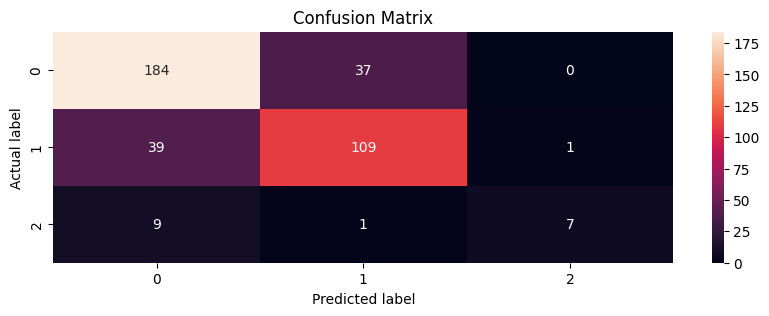

In [584]:
getConfusionMatrix(y_test, y_pred)

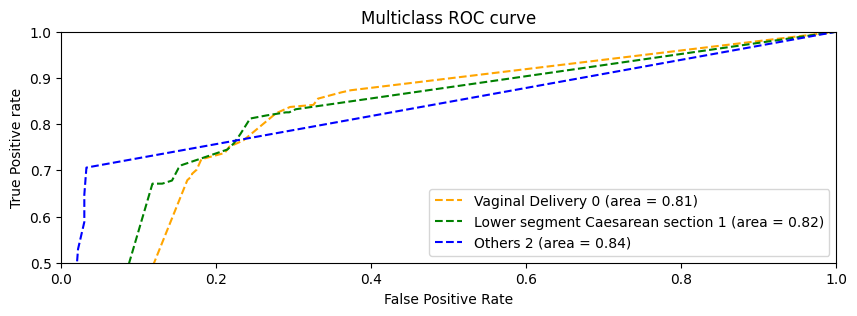

In [582]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = {}

# Number of classification
num_class = 3

# Store data
for i in range(num_class): 
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_clf[:,i], pos_label = i)
  roc_auc[i] = auc(fpr[i], tpr[i])

# plotting data 
fig= plt.subplots(figsize=(10, 3))
plt.xlim(0,1.0)
plt.ylim(0.5,1.0)
plt.plot(fpr[0], tpr[0], linestyle='--', color = 'orange', label = "Vaginal Delivery {0} (area = {1:0.2f})".format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], linestyle='--', color = 'green', label = "Lower segment Caesarean section {0} (area = {1:0.2f})".format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], linestyle='--', color = 'blue', label = "Others {0} (area = {1:0.2f})".format(2, roc_auc[2]))
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')

# Save figure 
plt.show() 

#Test Model

1. The age of the mother
2. The height of the mother 
3. A binary variable indicating whether the baby is in a breech presentation
4. A binary variable indicating whether the baby is in a cephalic presentation
5. A binary variable indicating whether the baby is in a presentation other than breech or cephalic
6. A binary variable indicating whether the amniotic fluid level is normal
7. A binary variable indicating whether the mother has no hypertension
8. A binary variable indicating whether the mother has pregnancy-induced hypertension
9. A binary variable indicating whether the mother has gestational diabetes mellitus
10. A binary variable indicating whether the mother has no diabetes

## Question 

1. What is your age?
2. What is your height in centimeters?
3. Is your baby currently in a breech position? (Yes/No)
4. Is your baby currently in a cephalic position? (Yes/No)
5. Is your baby currently in a position other than breech or cephalic? (Yes/No)
6. Is your amniotic fluid level normal? (Yes/No)
7. Do you have hypertension? (Yes/No)
8. Do you have pregnancy-induced hypertension? (Yes/No)
9. Do you have gestational diabetes mellitus? (Yes/No)
10. Do you have diabetes? (Yes/No)

Percentage of probability
Vaginal Delivery : 100.0
Lower segment Caesarean section : 0.0
Others : 0.0



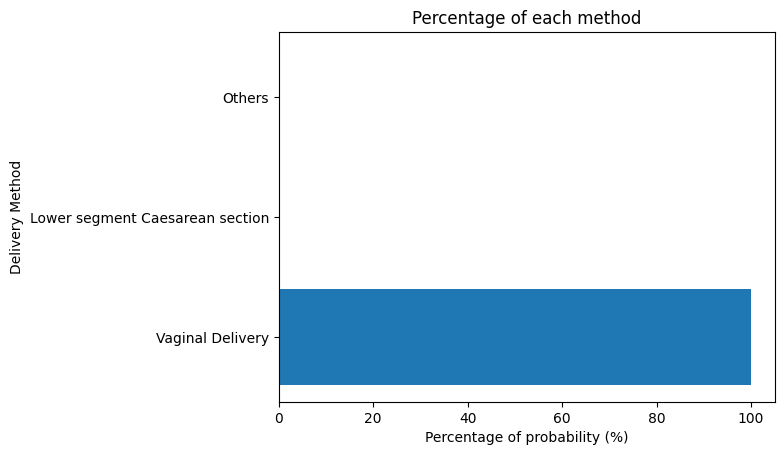


Your Recommended Delivery Method Result: Vaginal Delivery 

Stay active and upright during labour


In [ ]:
# Define the input values for the attributes
inputs = {'mum_age': [35], 'mum_height': [143], 'presentation_breech': [0], 'presentation_cephalic': [1], 'presentation_other': [0], 'amniotic_normal': [1], 'hypertension_nil': [1], 'hypertension_pih': [0], 'diabetes_gdm': [1], 'diabetes_nil': [0]}
inputs_df = pd.DataFrame(data = inputs)
test_Predict = clf.predict(inputs_df)
test_Predict_prob = clf.predict_proba(inputs_df)

# Probability of each birth delivery method class 
print('Percentage of probability')
j = 0
x_list = []
y_list = []
for i in test_Predict_prob[0]:
  print("{} : {c}". format(Birth_delivery[j], c = i*100))
  y_list.append(Birth_delivery[j])
  x_list.append(i*100)
  j += 1


print()
plt.barh(y_list, x_list) 
plt.xlabel("Percentage of probability (%)")
plt.ylabel("Delivery Method")
plt.title("Percentage of each method")
plt.show()

if test_Predict[0] == 0:
  result = 'Vaginal Delivery'
  note = 'Stay active and upright during labour'
if test_Predict[0] == 1:
  result = 'Lower segment Caesarean section'
  note = 'You may need to adjust your exercise routine depending on your individual situation'
if test_Predict[0] == 2:
  result = 'Others'
  note = 'you might need to consult with dr for suitable birth delivery method'

print("\nYour Recommended Delivery Method Result:", result, "\n")
print(note)

## Save Model

In [574]:
import pickle

def saveModel(model):
    #set the file path to save the file, and also the filename to be saved
    #the model is saved as .sav file
    filepath = '/content/gdrive/My Drive/UMHACK/delivery_mode_model.sav'  # change to your own filepath

    #save the model using pickle.dump
    try:
        pickle.dump(model, open(filepath, 'wb'))
        return "Model saved successfully!"
    except:
        return "Error saving model!"

In [577]:
# Save Model
saveModel(clf)

'Model saved successfully!'

## Load Model

In [578]:
def loadModel():
    #get the file path and also the filename to be loaded
    filepath =  '/content/gdrive/My Drive/UMHACK/delivery_mode_model.sav'

    #load the model using pickel.load
    loaded_model = pickle.load(open(filepath, 'rb'))
    return loaded_model

In [579]:
model = loadModel()